In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import matplotlib
matplotlib.rcParams['font.family']='simhei'
matplotlib.rcParams['font.sans-serif']=['simhei']

%matplotlib inline 

第1题答案过程如下：

In [2]:
data = pd.read_csv('shot-data.csv')
# 过滤掉shot_made_flag为nan的行
data = data[~data.shot_made_flag.isna()] 
# 分别统计行数和列数
num_rows, num_columns = data.shape
# 打印列名
column_names = data.columns
print(f"行数：{num_rows}")
print(f"列数：{num_columns}")
print("\n")
print("列名:")
for col in column_names:
    print(col)

行数：25697
列数：6


列名:
loc_x
loc_y
minutes_remaining
shot_distance
shot_made_flag
shot_id


第2题过程如下：

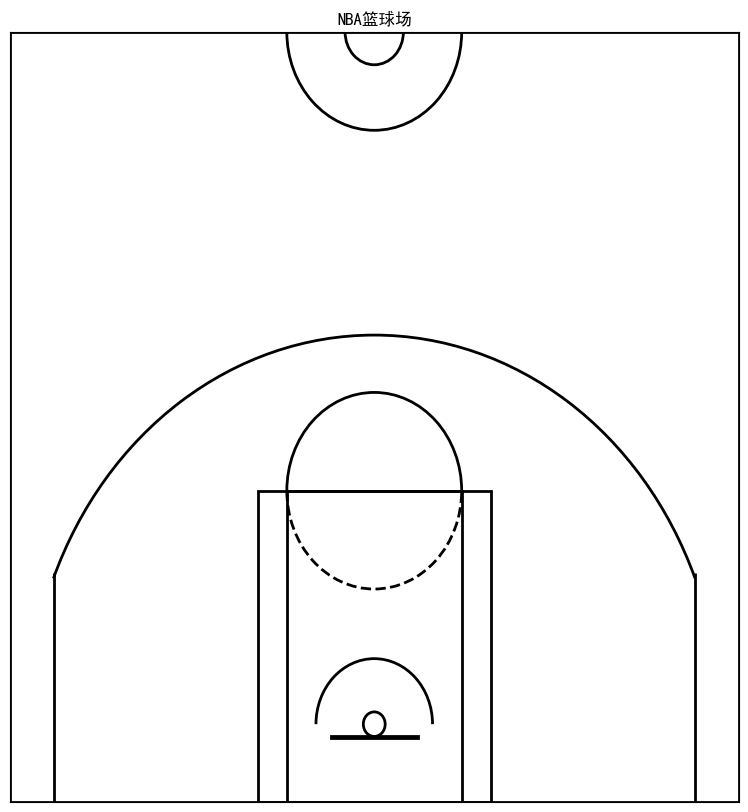

In [3]:
fig, ax = plt.subplots(figsize=(9.4, 10.0))
# 创建一个表示篮筐的圆形，位于原点（0,0），半径为7.5
color='black'
lw=2
outer_lines=True
hoop = patches.Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# 创建一个表示篮板的矩形，左下角坐标为(-30, -7.5)，宽度为60，高度为1
backboard = patches.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

# 创建两个表示罚球区的矩形
# 外框，左下角坐标为(-80, -47.5)，宽度为160，高度为190
outer_box = patches.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
# 内框，左下角坐标为(-60, -47.5)，宽度为120，高度为190
inner_box = patches.Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

# 创建两个表示罚球弧的弧线
# 顶部弧线，中心点在(0, 142.5)，宽度和高度均为120，从0度到180度
top_free_throw = patches.Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
# 底部弧线，中心点相同，从180度到0度，虚线样式
bottom_free_throw = patches.Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')

# 创建一个表示限制区的弧线，中心点在(0, 0)，宽度和高度均为80，从0度到180度
restricted = patches.Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

# 创建三分线
# 两个直线部分，分别在左侧(-220, -47.5)和右侧(220, -47.5)，高度均为140
corner_three_a = patches.Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
corner_three_b = patches.Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 一个弧线部分，中心点在(0, 0)，宽度和高度均为475，从22度到158度
three_arc = patches.Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

# 创建两个表示中圈的弧线
# 外弧线，中心点在(0, 422.5)，宽度和高度均为120，从180度到0度
center_outer_arc = patches.Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
center_inner_arc = patches.Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw,
                      restricted, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

if outer_lines:
    # 创建一个表示外边界线的矩形，左下角坐标为(-250, -47.5)，宽度为500，高度为470
    outer_lines = patches.Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
    court_elements.append(outer_lines)

for element in court_elements:
    ax.add_patch(element)
#将绘制投篮命中率注释掉即得到单纯的场地图#
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('NBA篮球场')
plt.show()

第3题过程如下：

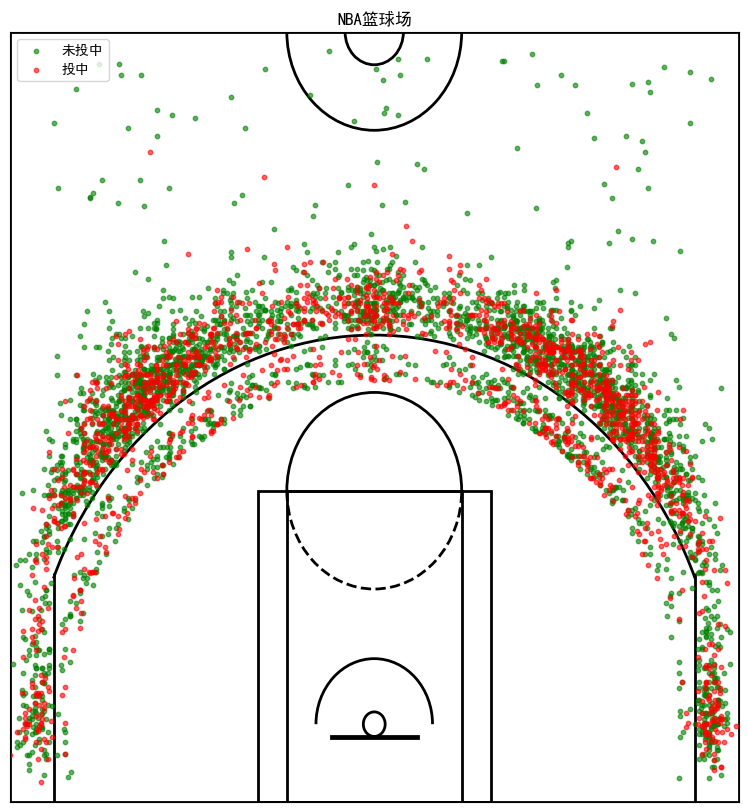

In [4]:
fig, ax = plt.subplots(figsize=(9.4, 10.0))
# 创建一个表示篮筐的圆形，位于原点（0,0），半径为7.5
color='black'
lw=2
outer_lines=True
hoop = patches.Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

# 创建一个表示篮板的矩形，左下角坐标为(-30, -7.5)，宽度为60，高度为1
backboard = patches.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

# 创建两个表示罚球区的矩形
# 外框，左下角坐标为(-80, -47.5)，宽度为160，高度为190
outer_box = patches.Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
# 内框，左下角坐标为(-60, -47.5)，宽度为120，高度为190
inner_box = patches.Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

# 创建两个表示罚球弧的弧线
# 顶部弧线，中心点在(0, 142.5)，宽度和高度均为120，从0度到180度
top_free_throw = patches.Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
# 底部弧线，中心点相同，从180度到0度，虚线样式
bottom_free_throw = patches.Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')

# 创建一个表示限制区的弧线，中心点在(0, 0)，宽度和高度均为80，从0度到180度
restricted = patches.Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

# 创建三分线
# 两个直线部分，分别在左侧(-220, -47.5)和右侧(220, -47.5)，高度均为140
corner_three_a = patches.Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
corner_three_b = patches.Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
# 一个弧线部分，中心点在(0, 0)，宽度和高度均为475，从22度到158度
three_arc = patches.Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

# 创建两个表示中圈的弧线
# 外弧线，中心点在(0, 422.5)，宽度和高度均为120，从180度到0度
center_outer_arc = patches.Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
center_inner_arc = patches.Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw,
                      restricted, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

if outer_lines:
    # 创建一个表示外边界线的矩形，左下角坐标为(-250, -47.5)，宽度为500，高度为470
    outer_lines = patches.Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
    court_elements.append(outer_lines)

for element in court_elements:
    ax.add_patch(element)
#以下是绘制投篮命中图#
made_shots = data[(data['shot_made_flag'] == 1) & (data['minutes_remaining'] <= 6) & (data['shot_distance'] >20)]
missed_shots = data[(data['shot_made_flag'] == 0) & (data['minutes_remaining'] <= 6) & (data['shot_distance'] >20)]
ax.scatter(missed_shots['loc_x'], missed_shots['loc_y'], c='green', s=10, alpha=0.6, label='未投中')
ax.scatter(made_shots['loc_x'], made_shots['loc_y'], c='red', s=10, alpha=0.6, label='投中')
ax.legend()
#将绘制投篮命中率注释掉即得到单纯的场地图#
ax.set_xlim(-250, 250)
ax.set_ylim(-47.5, 422.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('NBA篮球场')
plt.show()
    

第4题过程如下：

In [5]:
def train_val_test_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=42):
    assert len(X) == len(y)
    assert train_size + val_size + test_size == 1.0

    if random_state is not None:
        np.random.seed(random_state)

    # 混洗数据
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]
    
    # 计算划分索引
    train_end = int(train_size * len(X))
    val_end = train_end + int(val_size * len(X))
    
    X_train, y_train = X[:train_end], y[:train_end]
    X_val, y_val = X[train_end:val_end], y[train_end:val_end]
    X_test, y_test = X[val_end:], y[val_end:]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
def extract_feature(data):
    #######请在此处编写代码#######
    
    X = data[['loc_x', 'loc_y']].values.astype(np.float32)
    y = data['shot_made_flag'].values.astype(np.float32)
    
    #######编写结束#######
    return X, y

In [7]:
X, y = extract_feature(data)
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 15418
Validation set size: 5139
Test set size: 5140


In [8]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        #######请在此处填写代码#######
        self.linear = nn.Linear(2, 1)  
        #######填写结束#######

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [9]:
def train(model, optimizer, criterion, X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor):
    train_losses = []
    val_losses = []

    num_epochs = 500

    #######请在此处填写代码#######
    for epoch in range(num_epochs):
        # 训练模式
        model.train()
        
        # 前向传播
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 记录训练损失
        train_losses.append(loss.item())
        
        # 记录验证损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)
            val_losses.append(val_loss.item())
        
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    #######填写结束#######
    return train_losses, val_losses

In [10]:
def draw_loss(train_losses, val_losses):
    plt.figure(figsize=(10, 5))

    #######请在此处填写代码#######
    plt.plot(train_losses, label='Train Loss',color = 'blue')
    plt.plot(val_losses, label='Val Loss',color = 'red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    #######填写结束#######
    
    plt.legend()
    plt.show()

C:\ProgramData\Anaconda3\envs\ai4engineeringcourse\lib\site-packages\torch\autograd\__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10\cuda\CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [100/500], Loss: 12.1927, Val Loss: 11.6795
Epoch [200/500], Loss: 0.6873, Val Loss: 0.6806
Epoch [300/500], Loss: 0.6776, Val Loss: 0.6738
Epoch [400/500], Loss: 0.6772, Val Loss: 0.6735
Epoch [500/500], Loss: 0.6771, Val Loss: 0.6733


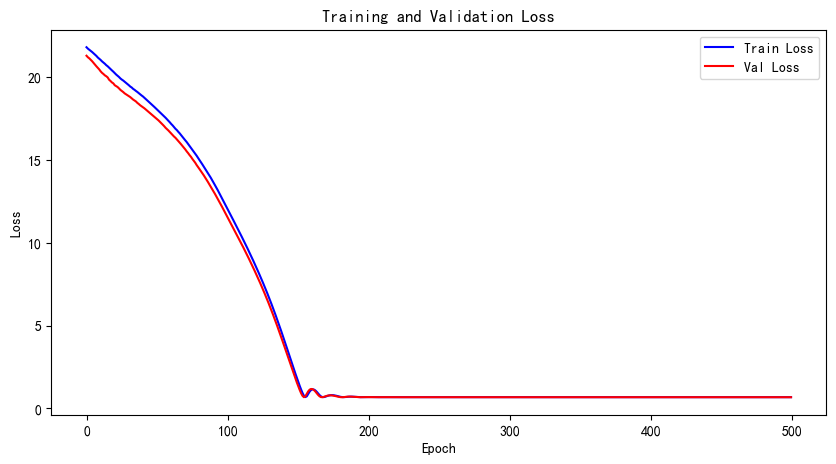

Test Accuracy: 57.43%


In [11]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model = LogisticRegressionModel()

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 二分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.003)  # 随机梯度下降优化器

# 训练模型
train_losses, val_losses = train(model, optimizer, criterion, X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor)

# 可视化loss
draw_loss(train_losses, val_losses)

# 在测试集上评估模型
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    accuracy = (test_outputs.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

第5题过程如下：

In [12]:
# 定义MLP模型
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        #######请在此处填写代码#######
        self.hidden1 = nn.Linear(2, 8)
        self.hidden2 = nn.Linear(8, 4)
        self.output = nn.Linear(4, 1)
        #######填写结束#######

    def forward(self, x):
        #######请在此处填写代码########
        x = torch.tanh(self.hidden1(x))
        x = torch.tanh(self.hidden2(x))
        x = torch.sigmoid(self.output(x))
        #######填写结束#######
        return x

Epoch [100/500], Loss: 0.6800, Val Loss: 0.6771
Epoch [200/500], Loss: 0.6761, Val Loss: 0.6722
Epoch [300/500], Loss: 0.6705, Val Loss: 0.6675
Epoch [400/500], Loss: 0.6690, Val Loss: 0.6663
Epoch [500/500], Loss: 0.6675, Val Loss: 0.6644


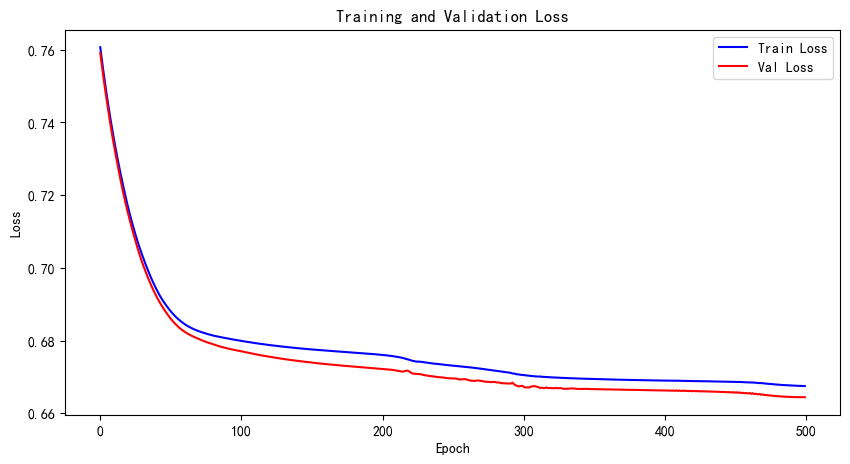

Test Accuracy: 60.93%


In [13]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

model = MLPModel()

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 二分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=0.003)  # 随机梯度下降优化器

# 训练模型
train_losses, val_losses = train(model, optimizer, criterion, X_train_tensor, X_val_tensor, y_train_tensor, y_val_tensor)

draw_loss(train_losses, val_losses)

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    accuracy = (test_outputs.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
    print(f'Test Accuracy: {accuracy * 100:.2f}%')